In [1]:
import time
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
print([X_train.shape, y_train.shape], [X_test.shape, y_test.shape])

[(105, 4), (105,)] [(45, 4), (45,)]


In [5]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [6]:
start_time = time.time()

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
dtc

DecisionTreeClassifier(criterion='entropy')

In [7]:
print("Execution Time:")
print(f"{execution_time:.8f} seconds")

Execution Time:
0.00800204 seconds


In [8]:
total_nodes = dtc.tree_.node_count
print(f"Total number of nodes in the tree:")
print(total_nodes)

Total number of nodes in the tree:
11


In [9]:
import numpy as np

node_indicator = dtc.decision_path(X_test)
nodes_visited_per_sample = node_indicator.sum(axis=1)
nodes_visited = np.array(nodes_visited_per_sample).flatten()

print(f"Average nodes visited: {np.mean(nodes_visited):.2f}")
print(f"Total nodes visited over all samples: {np.sum(nodes_visited)}")

Average nodes visited: 3.22
Total nodes visited over all samples: 145


In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[16  0  0]
 [ 0 10  2]
 [ 0  2 15]]


In [11]:
print(accuracy_score(y_test, y_pred))

0.9111111111111111


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      0.83      0.83        12
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [13]:
features = pd.DataFrame(dtc.feature_importances_, index=iris.feature_names)
features

,0
sepal length (cm),0.039922
sepal width (cm),0.024077
petal length (cm),0.029199
petal width (cm),0.906802


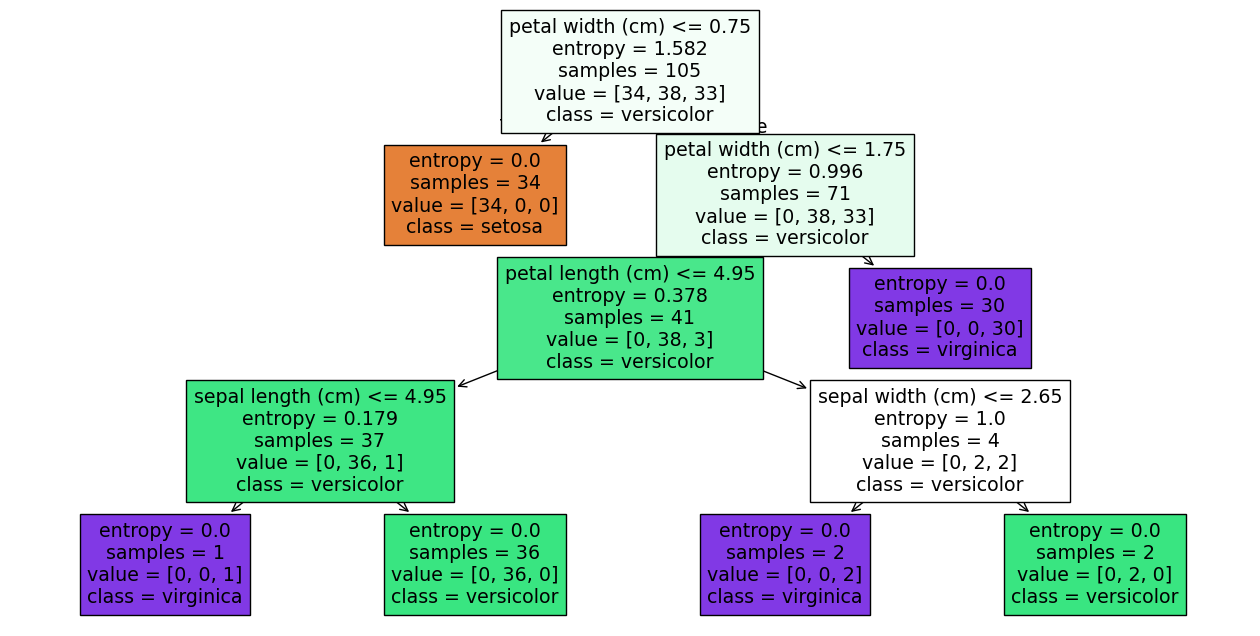

In [14]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
tree.plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()